## Train Agent on Osu Environment using Nosiy Dueling LSTM DQN

In [1]:
from environment import OsuEnvironment
from dqn_agent import DQN_Agent
from model import LSTM_DQN, DQN
import torch
import torch.nn as nn
import torch.optim as optim
import os
import warnings
import logging

if not os.path.exists('yolov5'):
    !git clone https://github.com/ultralytics/yolov5
    !pip install -r yolov5/requirements.txt

warnings.simplefilter("ignore", FutureWarning)
logging.getLogger('ultralytics').setLevel(logging.ERROR)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
# define arguments for Agent
env = OsuEnvironment(num_frame=4)
input_size = env.observation_space.shape[1] * env.observation_space.shape[2]
dueling_dqn = True
lstm = False
behavior_cloning = True

policy_net = DQN(env.num_frame, env.max_notes, env.action_space.nvec, dueling=dueling_dqn).to(device)
target_net = DQN(env.num_frame, env.max_notes, env.action_space.nvec, dueling=dueling_dqn).to(device)
target_net.load_state_dict(policy_net.state_dict())

optimizer = optim.SGD(policy_net.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0001)

agent = DQN_Agent(env, policy_net, target_net, optimizer, lstm=lstm, behavior_cloning=behavior_cloning, epsilon_decay=300)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\bohui/.cache\torch\hub\master.zip
YOLOv5  2024-11-28 Python-3.11.5 torch-2.5.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


Listening on 127.0.0.1:5555


In [3]:
# transitions = agent.expert_replay.sample(128)
# state_batch, action_batch, reward_batch, next_state_batch, done_batch = zip(*transitions)
# state_batch = torch.cat(state_batch)
# action_batch = torch.cat(action_batch)
# reward_batch = torch.cat(reward_batch)
# next_state_batch = torch.cat(next_state_batch)
# done_batch= torch.tensor([done for done in done_batch], dtype=torch.long, device=device)

In [4]:
# for i in state_batch:
#     for a in i:
#         print(a)

In [5]:
agent.pretrain(margin=0.8, total_episode=1000000)

Episod 10, pre-training loss: 9.47606372833252
Episod 20, pre-training loss: 9.26465892791748
Episod 30, pre-training loss: 8.528057098388672
Episod 40, pre-training loss: 8.184755325317383
Episod 50, pre-training loss: 7.492259502410889
Episod 60, pre-training loss: 6.929769515991211
Episod 70, pre-training loss: 6.888209342956543
Episod 80, pre-training loss: 7.006921768188477
Episod 90, pre-training loss: 5.886596202850342
Episod 100, pre-training loss: 6.198727130889893
Episod 110, pre-training loss: 6.678661823272705
Episod 120, pre-training loss: 6.447937965393066
Episod 130, pre-training loss: 6.122243881225586
Episod 140, pre-training loss: 6.37460470199585
Episod 150, pre-training loss: 6.845734119415283
Episod 160, pre-training loss: 6.015135765075684
Episod 170, pre-training loss: 5.868365287780762
Episod 180, pre-training loss: 6.290974140167236
Episod 190, pre-training loss: 5.550431728363037
Episod 200, pre-training loss: 5.804229259490967
Episod 210, pre-training loss: 6

In [6]:
agent.eval(total_episode=10)

In [7]:
agent.train(total_episode=500, margin=0.1)

Epsiode: 10: Total Reward: -88, Loss: 7.213355191548666
Epsiode: 20: Total Reward: -89, Loss: 8.521621492173937
Epsiode: 30: Total Reward: -64, Loss: 11.505297660827637
Epsiode: 40: Total Reward: -1224, Loss: 11.76259848916319
Epsiode: 50: Total Reward: -150, Loss: 11.458910428560698
Epsiode: 60: Total Reward: -169, Loss: 14.724383393923441
Epsiode: 70: Total Reward: -161, Loss: 15.333918317159016
Epsiode: 80: Total Reward: -819, Loss: 14.240733023347525
Epsiode: 90: Total Reward: -219, Loss: 17.727178280170147
Epsiode: 100: Total Reward: -1142, Loss: 20.804066184471395
Epsiode: 110: Total Reward: -173, Loss: 14.5901700428554
Epsiode: 120: Total Reward: -215, Loss: 13.911647867273402
Epsiode: 130: Total Reward: -107, Loss: 14.037746516141025
Epsiode: 140: Total Reward: 0, Loss: 13.929112116495768
Epsiode: 150: Total Reward: -120, Loss: 12.681396372178021
Epsiode: 160: Total Reward: -137, Loss: 16.015652990341188
Epsiode: 170: Total Reward: -85, Loss: 16.14871644973755
Epsiode: 180: Tot

In [11]:
# ensure inline ploting is enable
%matplotlib inline

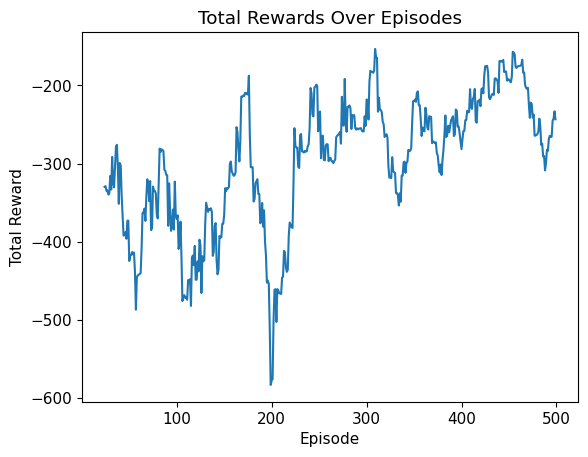

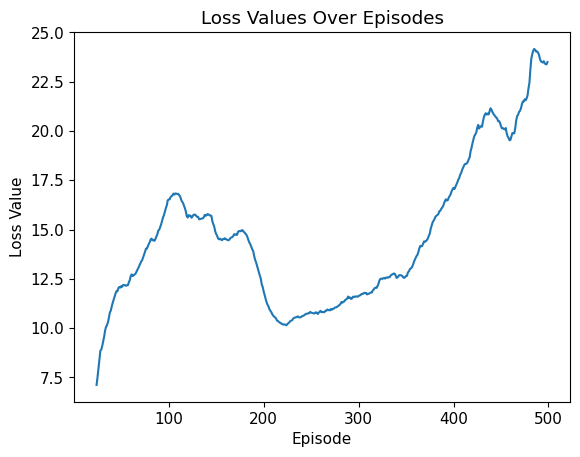

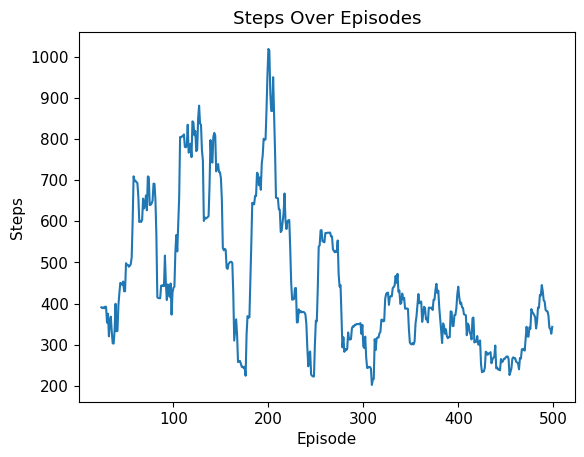

In [12]:
agent.plot()

In [13]:
agent.eval(total_episode=10)

KeyboardInterrupt: 